Image shape: (303, 384)
Pixel intensities: 1 to 252


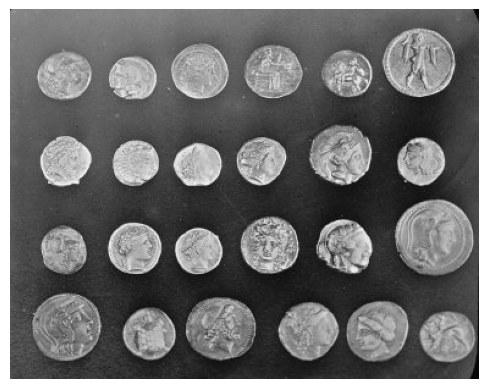

In [4]:
#Ex.1:1. Load and visualize the 'coins' image from the skimage built-in datasets.
#Report the size of the image and range of the pixel grayscale levels.
from skimage import data
import matplotlib.pyplot as plt

# Load
image = data.coins()

# Report size and range
print("Image shape:", image.shape)
print("Pixel intensities:", image.min(), "to", image.max())

# Visualize in gray
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


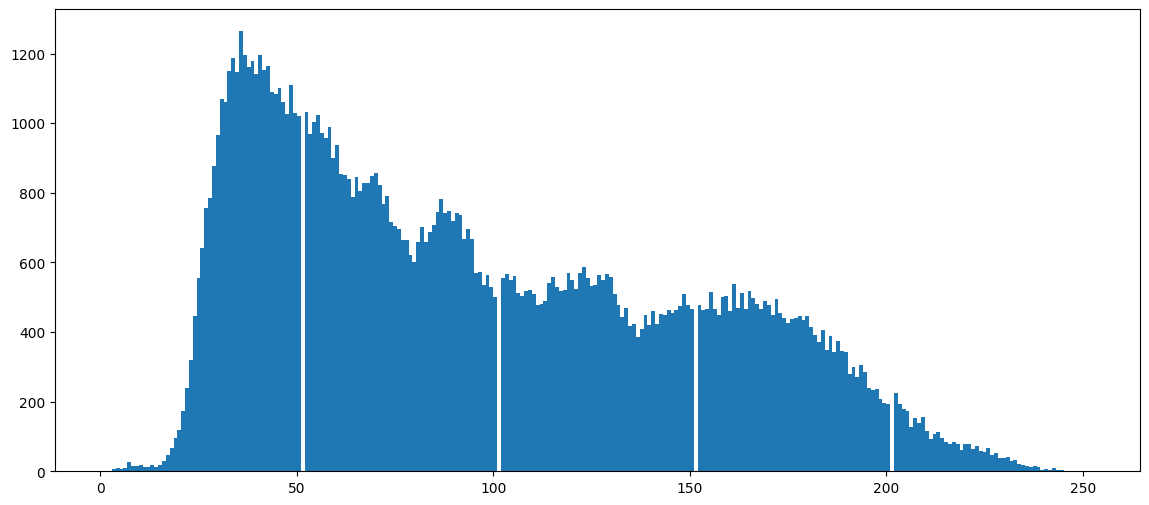

In [5]:
#Ex.2. Represent the histogram of the image.
#Explain the peaks of the histogram in terms of regions of the image.
v = image.reshape(image.shape[0]*image.shape[1],1)

fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

#We have 5 different regions as we see.
# 1. Dark Peak (20-50), the flat, non-coin areas, shadows etc, fall in this low‐intensity range.
# 2. Mid-gray values peak (50-100) - main coin surfaces
# 3. Mid-Bright peak (100-150) - catch more light
# 4. Bright Peak (150-200) - highlights like the coin edges etc
# 5. The last "peak"(200-250) - occupy the extreme of the histogram



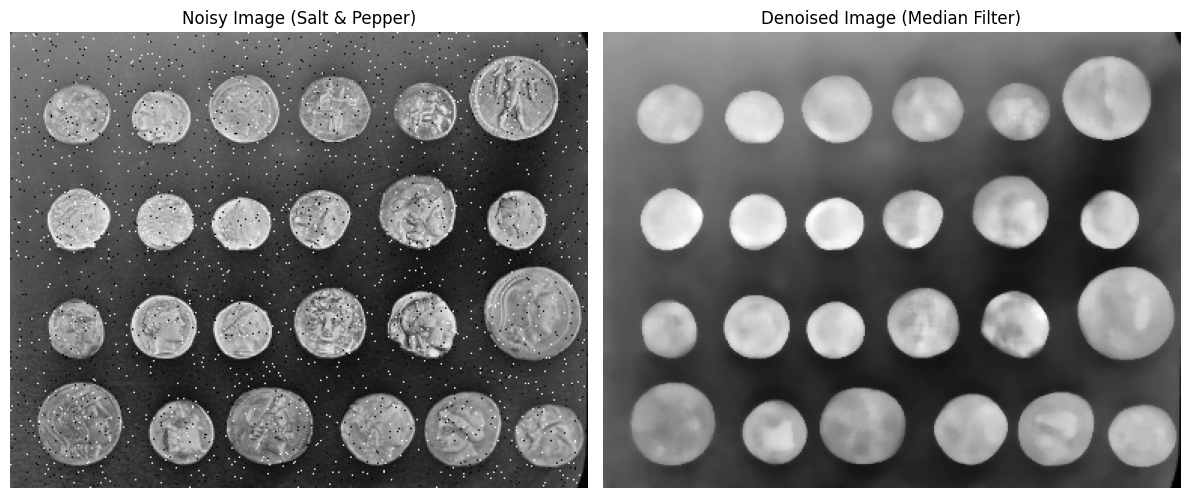

In [11]:
#Ex.3 3. Applied noise to the image and use the correct function to erase the noise.
import matplotlib.pyplot as plt
import numpy as np
from skimage import data
from skimage import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import median

#S&P noise
noise = np.random.random(image.shape)
noisy_image = img_as_ubyte(data.coins())
noisy_image[noise > 0.99] = 255
noisy_image[noise < 0.01] = 0

#Removing noise using the median filter technique
img = img_as_ubyte(noisy_image)
sel5 = disk(5)
img_med5x5 = median(img, sel5)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(noisy_image, cmap='gray')
ax[0].set_title('Noisy Image (Salt & Pepper)')
ax[0].axis('off')

ax[1].imshow(img_med5x5, cmap='gray')
ax[1].set_title('Denoised Image (Median Filter)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

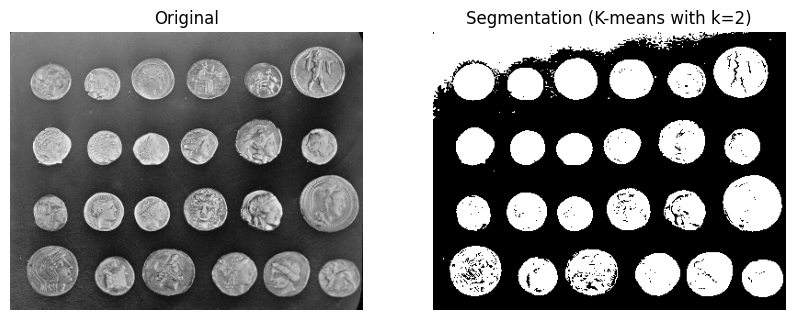

In [13]:
#4. Segment the image using a k-means clustering algorithm with k=2 and represent the result
v_I = image.reshape(-1, 1)

n_clus = 2
kmeans = KMeans(n_clusters=n_clus, random_state=0).fit(v_I)
v_kmeans = kmeans.predict(v_I)

I_kmeans = np.reshape(v_kmeans, (image.shape[0], image.shape[1]))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax1 = fig.add_subplot(gs[0,0])
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original')
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[0,1])
ax2.imshow(I_kmeans, cmap=plt.cm.gray)
ax2.set_title('Segmentation (K-means with k={})'.format(n_clus))
ax2.set_axis_off()

plt.show()



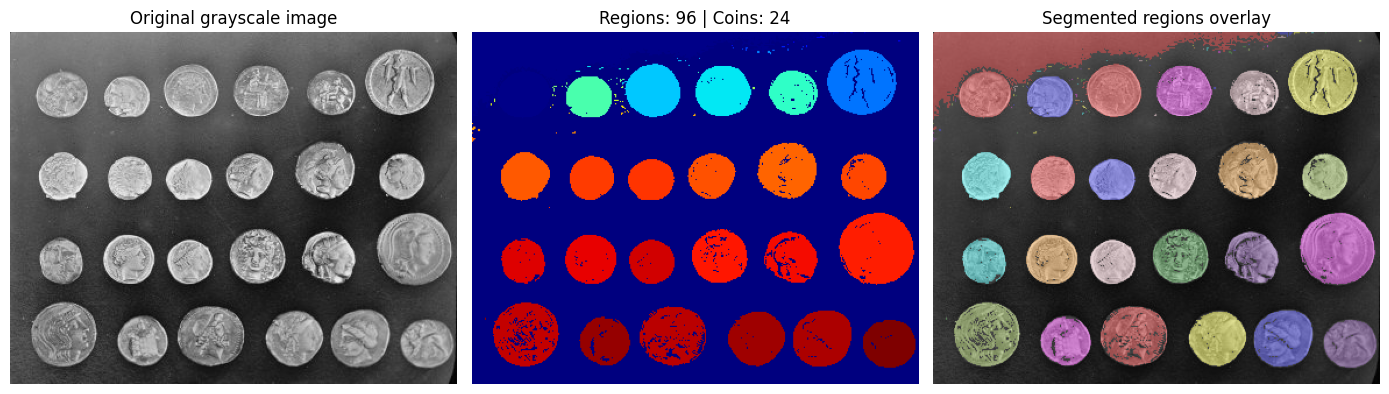

In [31]:
#5. Label the objects found in the image. Generate a figure with the original image and the labeled image. How many coins are there in the image?
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.color import label2rgb
import matplotlib.pyplot as plt
import numpy as np

IG = IG.squeeze()
thresh = threshold_otsu(IG)
bw = IG > thresh

label_image, nregions = label(bw, return_num=True)
image_label_overlay = label2rgb(label_image, image=IG)

props = regionprops(label_image)
min_area = 450
ncoins = sum([1 for p in props if p.area >= min_area])

fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()
ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('Original grayscale image')
ax[0].set_axis_off()

ax[1].imshow(label_image, cmap=plt.cm.jet)
ax[1].set_title('Regions: {} | Coins: {}'.format(nregions, ncoins))  # Corrected title
ax[1].set_axis_off()

ax[2].imshow(image_label_overlay, cmap=plt.cm.jet)
ax[2].set_title('Segmented regions overlay')
ax[2].set_axis_off()

plt.tight_layout()
plt.show()

In [40]:
#Ex.6:  Extract the area, major axis length and orientation of each coin.
#Report the average values of the extracted features. Represent a scatterplot of the area vs major axis length.

import pandas as pd
import seaborn as sns
from skimage.measure import regionprops_table

props = regionprops_table(label_image, properties=['label', 'area', 'orientation', 'axis_major_length'])
df_features = pd.DataFrame(props)
df_features.head()


,label,area,orientation,axis_major_length
0,1,8792.0,-1.423583,292.106573
1,2,37.0,1.524098,14.020584
2,3,21.0,-1.508404,16.645960
3,4,1.0,-0.785398,0.000000
4,5,2.0,0.000000,2.000000


In [24]:
print('Average area: {:.2f}'.format(df_features['area'].mean()))
print('Average major axis length: {:.2f}'.format(df_features['axis_major_length'].mean()))
print('Average orientation: {:.2f} degrees'.format(df_features['orientation'].mean()))


Average area: 469.97
Average major axis length: 15.76
Average orientation: -0.16 degrees


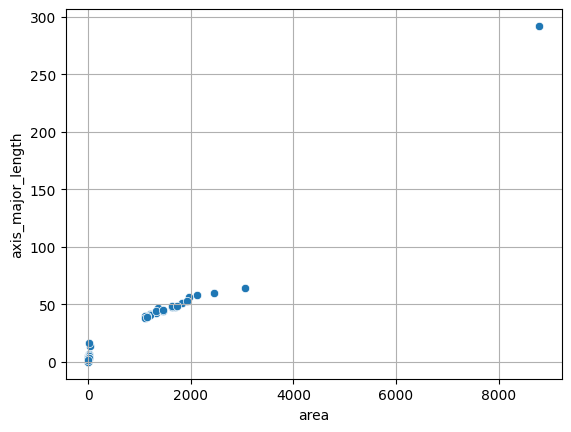

In [25]:
sns.scatterplot(x='area', y='axis_major_length', data=df_features)
plt.grid(True)
plt.show()

In [28]:
#Ex.7 Using the labeled regions from the 'coins' image, how can I filter the regions to find those with an area greater than 1750 pixels, count how many such coins there are?
df_large_coins = df_features.loc[df_features['area'] > 1750]
df_large_coins.head()
print('Number of coins with area > 1750 pixels is {}'.format(df_large_coins.shape[0]))

#Compute all region properties, than we built the data frame and we filtered by the area >1750.


Number of coins with area > 1750 pixels is 7


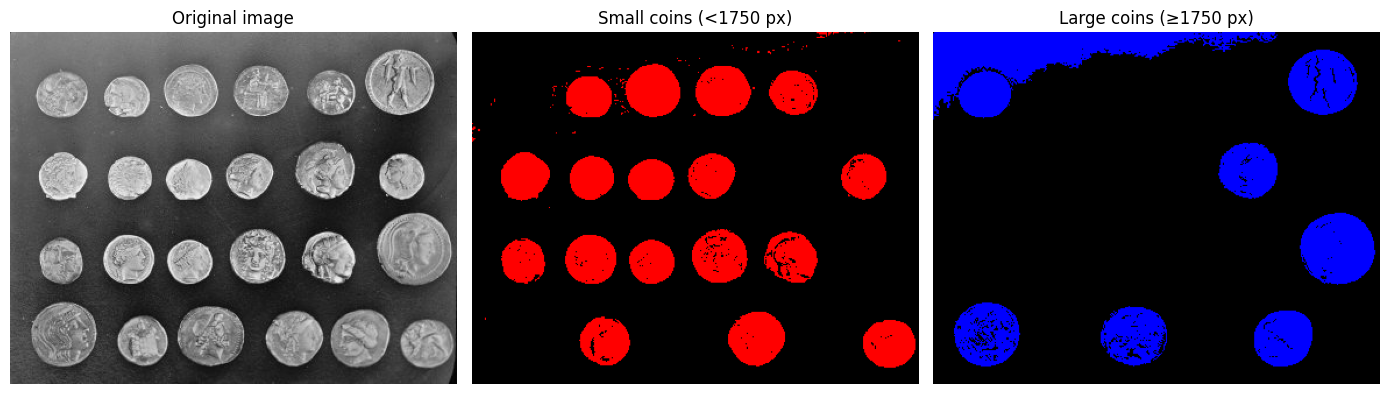

In [36]:
#Ex.8: Generate a 3-panel figure with the original image, the image with the little
#coins < 1750 coins (red color) and an image with the big coins > 1750 (blue color).

df_small_coins = df_features[df_features['area'] < 1750]
df_large_coins = df_features[df_features['area'] > 1750]

# labels
labels_small = df_small_coins['label'].values
labels_large = df_large_coins['label'].values

# binary masks
mask_small = np.isin(label_image, labels_small)
mask_large = np.isin(label_image, labels_large)

# RGB overlays
rgb_small = np.zeros((*label_image.shape, 3), dtype=np.uint8)
rgb_large = np.zeros((*label_image.shape, 3), dtype=np.uint8)

rgb_small[mask_small] = [255, 0, 0]  # red for small coins
rgb_large[mask_large] = [0, 0, 255]  # blue for large coins

# the original & colored masks
fig, axes = plt.subplots(1, 3, figsize=(14, 9))
ax = axes.ravel()

ax[0].imshow(IG, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(rgb_small)
ax[1].set_title('Small coins (<1750 px)')

ax[2].imshow(rgb_large)
ax[2].set_title('Large coins (≥1750 px)')

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

plt.tight_layout()
plt.show()



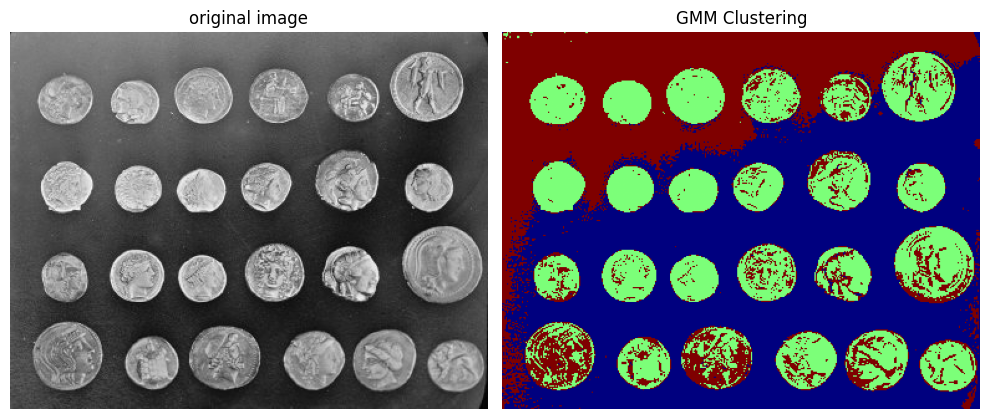

In [42]:
#Ex.9 Describe the main steps required to perform segmentation of an
# RGB image using an unsupervised clustering algorithm (use other algorithms different than K-Means and compare the results)
from sklearn import mixture


height, width = image.shape
v_I = image.reshape((-1, 1))

gmm = mixture.GaussianMixture(n_components=3, random_state=0).fit(v_I)
v_gmm = gmm.predict(v_I)
I_gmm = np.reshape(v_gmm, (height, width))

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.set_axis_off()

ax1 = fig.add_subplot(gs[0, 1])
ax1.imshow(I_gmm, cmap='jet')
ax1.set_title('GMM Clustering')
ax1.set_axis_off()

plt.tight_layout()
plt.show()

#K-Means does hard clustering ; GMM does soft, probability-based assignments.
#K-Means gives crisp, blocky edges; GMM yields smoother.
#K-Means assumes equal-sized clusters; GMM models differing shapes and variances.
#K-Means is faster; GMM is slower but more precise around intensity transitions.


In [44]:
#Ex.10 Extract the main texture features of this image
import numpy as np
from skimage import data, img_as_ubyte
from skimage.feature.texture import graycomatrix, graycoprops

IG = img_as_ubyte(IG)
glcm = graycomatrix(IG, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

contrast = graycoprops(glcm, 'contrast')[0, 0]
dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
energy = graycoprops(glcm, 'energy')[0, 0]
correlation = graycoprops(glcm, 'correlation')[0, 0]

print("Texture features for the entire image:")
print(f"Contrast: {contrast:.4f}")
print(f"Dissimilarity: {dissimilarity:.4f}")
print(f"Homogeneity: {homogeneity:.4f}")
print(f"Energy: {energy:.4f}")
print(f"Correlation: {correlation:.4f}")

Texture features for the entire image:
Contrast: 351.8455
Dissimilarity: 9.2926
Homogeneity: 0.2382
Energy: 0.0196
Correlation: 0.9372
